In [ ]:
# prompt: csv 확장자 파일 하나를 같은 경로에서 읽어와서 df에 담아주기

import pandas as pd

# 파일 경로를 지정합니다.
file_path = 'ssfshop-product-list.csv'  # 'your_file.csv'를 실제 파일 이름으로 변경하세요.

try:
    df = pd.read_csv(file_path)
    print(df.head())  # 데이터프레임의 처음 5행을 출력하여 확인합니다.
except FileNotFoundError:
    print(f"파일 '{file_path}'를 찾을 수 없습니다.")
except pd.errors.ParserError:
    print(f"파일 '{file_path}'를 파싱하는 중 오류가 발생했습니다.")
except Exception as e:
    print(f"오류 발생: {e}")


             godno                                               link  \
0  GM0024102287130  /8-seconds/GM0024102287130/good?utag=ref_sch:%...   
1  GM0024102287131  /8-seconds/GM0024102287131/good?utag=ref_sch:%...   
2  GM0024102179613  /8-seconds/GM0024102179613/good?utag=ref_sch:%...   
3  GQ3624112580347  /ULLALA/GQ3624112580347/good?utag=ref_sch:%EC%...   
4  GQ3624110415501  /ULLALA/GQ3624110415501/good?utag=ref_sch:%EC%...   

                                             img_url      brand  \
0  https://img.ssfshop.com/cmd/LB_500x660/src/htt...  8 seconds   
1  https://img.ssfshop.com/cmd/LB_500x660/src/htt...  8 seconds   
2  https://img.ssfshop.com/cmd/LB_500x660/src/htt...  8 seconds   
3  https://img.ssfshop.com/cmd/LB_500x660/src/htt...     ULLALA   
4  https://img.ssfshop.com/cmd/LB_500x660/src/htt...     ULLALA   

                        name original_price sale_price sale_rate  \
0    바오패밀리 극세사 파자마 세트 - 아이보리      원가49,900원          원    할인율40%   
1  루이&후이 극세사 파자마 세트 - 

In [ ]:
# prompt: 다음 데이터를 수치형으로 변환할 것 문자 데이터는 무시하고 결측치 처리할 것
# likes,
# original_price 는 원가 49,900원 -> 49900 형식으로 문자를 제거하고 수치형으로 변환.
# sale_price는 원가 69,000원 -> 69000 형식으로 문자를 제거하고 수치형으로 변환,
# sale_rate는 할인률 10% -> 10 으로 문자를 제거하고 수치형으로 변환

import pandas as pd
import re

# 파일 경로를 지정합니다.
file_path = 'ssfshop-product-list.csv'  # 'your_file.csv'를 실제 파일 이름으로 변경하세요.

try:
    df = pd.read_csv(file_path)

    # 'likes' 열을 수치형으로 변환 (문자열 제거)
    df['likes'] = pd.to_numeric(df['likes'], errors='coerce')

    # 'original_price', 'sale_price' 열에서 숫자만 추출하여 수치형으로 변환
    def extract_number(price_str):
        if pd.isna(price_str):  # 결측치 처리
            return None
        match = re.search(r'(\d+)', str(price_str))
        if match:
            return int(match.group(1))
        else:
            return None

    df['original_price'] = df['original_price'].apply(extract_number)
    df['sale_price'] = df['sale_price'].apply(extract_number)

    # 'sale_rate' 열에서 숫자만 추출하여 수치형으로 변환 (문자열 제거)
    def extract_sale_rate(rate_str):
        if pd.isna(rate_str):
          return None
        match = re.search(r'(\d+)', str(rate_str))
        if match:
            return int(match.group(1))
        else:
            return None

    df['sale_rate'] = df['sale_rate'].apply(extract_sale_rate)

    # 결측치 처리 (0으로 채우기)
    df.fillna(0, inplace=True)


    print(df.head())  # 데이터프레임의 처음 5행을 출력하여 확인합니다.

    print(df.dtypes) # 데이터 타입 확인

except FileNotFoundError:
    print(f"파일 '{file_path}'를 찾을 수 없습니다.")
except pd.errors.ParserError:
    print(f"파일 '{file_path}'를 파싱하는 중 오류가 발생했습니다.")
except Exception as e:
    print(f"오류 발생: {e}")

             godno                                               link  \
0  GM0024102287130  /8-seconds/GM0024102287130/good?utag=ref_sch:%...   
1  GM0024102287131  /8-seconds/GM0024102287131/good?utag=ref_sch:%...   
2  GM0024102179613  /8-seconds/GM0024102179613/good?utag=ref_sch:%...   
3  GQ3624112580347  /ULLALA/GQ3624112580347/good?utag=ref_sch:%EC%...   
4  GQ3624110415501  /ULLALA/GQ3624110415501/good?utag=ref_sch:%EC%...   

                                             img_url      brand  \
0  https://img.ssfshop.com/cmd/LB_500x660/src/htt...  8 seconds   
1  https://img.ssfshop.com/cmd/LB_500x660/src/htt...  8 seconds   
2  https://img.ssfshop.com/cmd/LB_500x660/src/htt...  8 seconds   
3  https://img.ssfshop.com/cmd/LB_500x660/src/htt...     ULLALA   
4  https://img.ssfshop.com/cmd/LB_500x660/src/htt...     ULLALA   

                        name  original_price  sale_price  sale_rate  \
0    바오패밀리 극세사 파자마 세트 - 아이보리            49.0           0       40.0   
1  루이&후이 극세사 파자마

<ipython-input-37-a44e0b9f99f5>:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0, inplace=True)


array([[<Axes: title={'center': 'original_price'}>,
        <Axes: title={'center': 'sale_price'}>],
       [<Axes: title={'center': 'sale_rate'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'reviews'}>,
        <Axes: title={'center': 'likes'}>]], dtype=object)

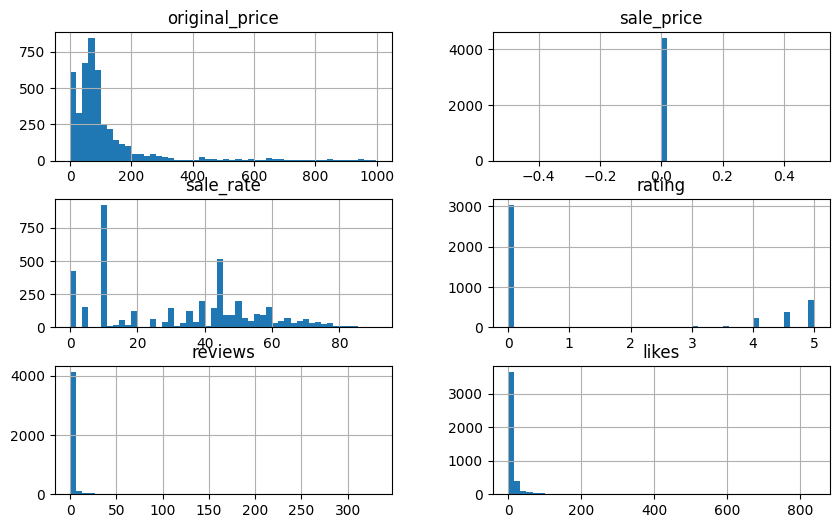

In [ ]:
df.hist(figsize=(10, 6), bins=50)

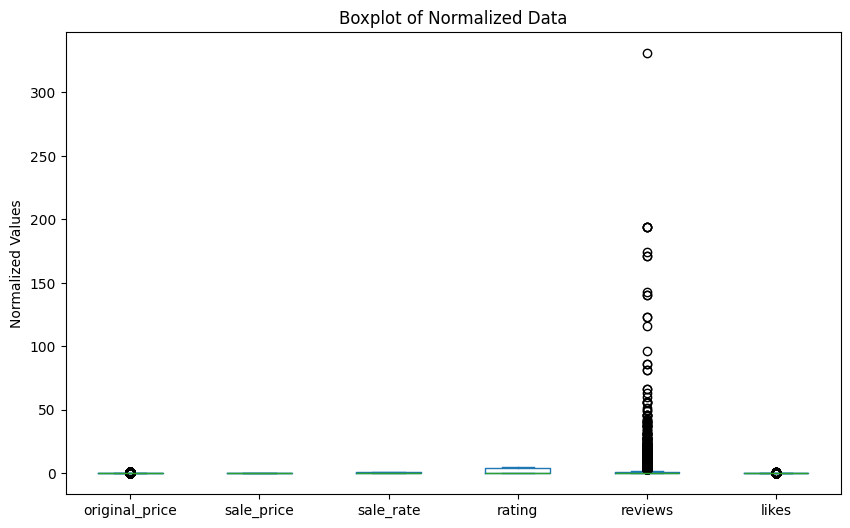

In [ ]:
# prompt: df변수의 값을 정규화하고 새로운 변수에 할당해서 전체 박스플롯을 시각화

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 정규화할 열 선택 (필요에 따라 수정)
cols_to_normalize = ['likes', 'original_price', 'sale_price', 'sale_rate']

# MinMaxScaler를 사용하여 데이터 정규화
scaler = MinMaxScaler()
df_normalized = df.copy()  # 원본 데이터프레임을 변경하지 않기 위해 복사
df_normalized[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 전체 박스플롯 시각화
df_normalized.plot(kind='box', figsize=(10, 6))
plt.title('Boxplot of Normalized Data')
plt.ylabel('Normalized Values')
plt.show()

In [ ]:
df

,godno,link,img_url,brand,name,original_price,sale_price,sale_rate,tags,rating,reviews,likes
0,GM0024102287130,/8-seconds/GM0024102287130/good?utag=ref_sch:%...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,8 seconds,바오패밀리 극세사 파자마 세트 - 아이보리,49.0,0,40.0,"['페이백', '클리어런스']",4.5,171.0,766.0
1,GM0024102287131,/8-seconds/GM0024102287131/good?utag=ref_sch:%...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,8 seconds,루이&후이 극세사 파자마 세트 - 스카이 블루,49.0,0,40.0,"['페이백', '클리어런스']",4.5,171.0,604.0
2,GM0024102179613,/8-seconds/GM0024102179613/good?utag=ref_sch:%...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,8 seconds,극세사 파자마 세트 - 아이보리,49.0,0,40.0,"['페이백', '클리어런스']",4.5,24.0,363.0
3,GQ3624112580347,/ULLALA/GQ3624112580347/good?utag=ref_sch:%EC%...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,ULLALA,무슈2 긴팔 여성페어 네이비 (21수),96.0,0,65.0,['페이백'],4.5,4.0,158.0
4,GQ3624110415501,/ULLALA/GQ3624110415501/good?utag=ref_sch:%EC%...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,ULLALA,오필리아 긴팔 여성페어 네이비 (30수),92.0,0,70.0,['페이백'],4.5,4.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4393,GPEB24112851621,/CATCH-TEENIEPING/GPEB24112851621/good?utag=re...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,CATCH TEENIEPING,[캐치티니핑] 꼭필요한 샤샤 기모 맨투맨 샤 원피스_0D36W00163,0.0,0,0.0,['품절'],0.0,0.0,0.0
4394,GPEB24112851609,/CATCH-TEENIEPING/GPEB24112851609/good?utag=re...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,CATCH TEENIEPING,[캐치티니핑] 캐치! 티니핑 리리 아뜰리에 기모 원피스_0D36W00188,0.0,0,0.0,['품절'],0.0,0.0,0.0
4395,GPEB24112851709,/CATCH-TEENIEPING/GPEB24112851709/good?utag=re...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,CATCH TEENIEPING,[캐치티니핑] 샤샤 블라썸 이지웨어 기모 맨투맨_0D3TW00096,0.0,0,0.0,['품절'],0.0,0.0,0.0
4396,GPEB24112851672,/CATCH-TEENIEPING/GPEB24112851672/good?utag=re...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,CATCH TEENIEPING,[캐치티니핑] 샤샤 블라썸 이지웨어 기모 리본 바지_0D35W00100,42.0,0,55.0,['품절'],0.0,0.0,0.0


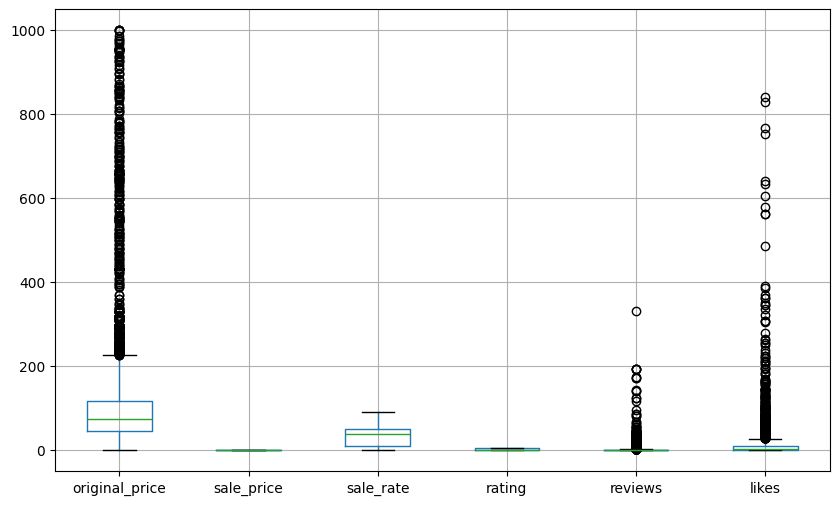

In [ ]:
df.boxplot(figsize=(10, 6));

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   godno           4398 non-null   object 
 1   link            4398 non-null   object 
 2   img_url         4398 non-null   object 
 3   brand           4398 non-null   object 
 4   name            4398 non-null   object 
 5   original_price  4398 non-null   float64
 6   sale_price      4398 non-null   int64  
 7   sale_rate       4398 non-null   float64
 8   tags            4398 non-null   object 
 9   rating          4398 non-null   float64
 10  reviews         4398 non-null   float64
 11  likes           4398 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 412.4+ KB


In [ ]:
# prompt: df 변수의 데이터로 기초 기술통계 작성하되 수치형, 범주형 변수를 구분해서 작성할 것

# 수치형 변수 기술통계
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical Features Descriptive Statistics:")
print(df[numerical_cols].describe())

# 범주형 변수 기술통계
categorical_cols = df.select_dtypes(exclude=['number']).columns
print("\nCategorical Features Descriptive Statistics:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

Numerical Features Descriptive Statistics:
       original_price  sale_price    sale_rate       rating      reviews  \
count     4398.000000      4398.0  4398.000000  4398.000000  4398.000000   
mean       115.293088         0.0    33.035471     1.421101     2.294679   
std        153.254157         0.0    22.690492     2.136257    11.751232   
min          0.000000         0.0     0.000000     0.000000     0.000000   
25%         46.000000         0.0    10.000000     0.000000     0.000000   
50%         75.000000         0.0    39.000000     0.000000     0.000000   
75%        118.000000         0.0    50.000000     4.000000     1.000000   
max        999.000000         0.0    91.000000     5.000000   331.000000   

             likes  
count  4398.000000  
mean     13.796953  
std      45.186822  
min       0.000000  
25%       0.000000  
50%       3.000000  
75%      11.000000  
max     839.000000  

Categorical Features Descriptive Statistics:

Column: godno
godno
GM0024102287130 

In [ ]:
df.describe()

,original_price,sale_price,sale_rate,rating,reviews,likes
count,4398.000000,4398.0,4398.000000,4398.000000,4398.000000,4398.000000
mean,115.293088,0.0,33.035471,1.421101,2.294679,13.796953
std,153.254157,0.0,22.690492,2.136257,11.751232,45.186822
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.0,10.000000,0.000000,0.000000,0.000000
50%,75.000000,0.0,39.000000,0.000000,0.000000,3.000000
75%,118.000000,0.0,50.000000,4.000000,1.000000,11.000000
max,999.000000,0.0,91.000000,5.000000,331.000000,839.000000


In [ ]:
df.describe(exclude='number')

,godno,link,img_url,brand,name,tags
count,4398,4398,4398,4398,4398,4398
unique,4398,4398,4397,221,4389,7
top,GM0024102287130,/8-seconds/GM0024102287130/good?utag=ref_sch:%...,https://img.ssfshop.com,LUNALUZ STUDIO,UNISEX COMFY TERRY ROBE_BLUE,[]
freq,1,1,2,587,2,2534


In [ ]:
df

,godno,link,img_url,brand,name,original_price,sale_price,sale_rate,tags,rating,reviews,likes
0,GM0024102287130,/8-seconds/GM0024102287130/good?utag=ref_sch:%...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,8 seconds,바오패밀리 극세사 파자마 세트 - 아이보리,49.0,0,40.0,"['페이백', '클리어런스']",4.5,171.0,766.0
1,GM0024102287131,/8-seconds/GM0024102287131/good?utag=ref_sch:%...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,8 seconds,루이&후이 극세사 파자마 세트 - 스카이 블루,49.0,0,40.0,"['페이백', '클리어런스']",4.5,171.0,604.0
2,GM0024102179613,/8-seconds/GM0024102179613/good?utag=ref_sch:%...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,8 seconds,극세사 파자마 세트 - 아이보리,49.0,0,40.0,"['페이백', '클리어런스']",4.5,24.0,363.0
3,GQ3624112580347,/ULLALA/GQ3624112580347/good?utag=ref_sch:%EC%...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,ULLALA,무슈2 긴팔 여성페어 네이비 (21수),96.0,0,65.0,['페이백'],4.5,4.0,158.0
4,GQ3624110415501,/ULLALA/GQ3624110415501/good?utag=ref_sch:%EC%...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,ULLALA,오필리아 긴팔 여성페어 네이비 (30수),92.0,0,70.0,['페이백'],4.5,4.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4393,GPEB24112851621,/CATCH-TEENIEPING/GPEB24112851621/good?utag=re...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,CATCH TEENIEPING,[캐치티니핑] 꼭필요한 샤샤 기모 맨투맨 샤 원피스_0D36W00163,0.0,0,0.0,['품절'],0.0,0.0,0.0
4394,GPEB24112851609,/CATCH-TEENIEPING/GPEB24112851609/good?utag=re...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,CATCH TEENIEPING,[캐치티니핑] 캐치! 티니핑 리리 아뜰리에 기모 원피스_0D36W00188,0.0,0,0.0,['품절'],0.0,0.0,0.0
4395,GPEB24112851709,/CATCH-TEENIEPING/GPEB24112851709/good?utag=re...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,CATCH TEENIEPING,[캐치티니핑] 샤샤 블라썸 이지웨어 기모 맨투맨_0D3TW00096,0.0,0,0.0,['품절'],0.0,0.0,0.0
4396,GPEB24112851672,/CATCH-TEENIEPING/GPEB24112851672/good?utag=re...,https://img.ssfshop.com/cmd/LB_500x660/src/htt...,CATCH TEENIEPING,[캐치티니핑] 샤샤 블라썸 이지웨어 기모 리본 바지_0D35W00100,42.0,0,55.0,['품절'],0.0,0.0,0.0
